<a href="https://colab.research.google.com/github/futureCodersSE/data-roles/blob/main/Data_consolidation_and_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
def import_data(url):
  df = pd.read_excel(url+"?raw=true", index_col=0)
  return df

hrgo_df = import_data("https://github.com/futureCodersSE/data-roles/blob/main/hrgo_df.xlsx")
jobsinkent_df = import_data("https://github.com/futureCodersSE/data-roles/blob/main/jobsinkent_df.xlsx")
full_reed_df = import_data("https://github.com/futureCodersSE/data-roles/blob/main/reed_full_job_df.xlsx")
df_list = [hrgo_df,jobsinkent_df,full_reed_df]


In [84]:
display(hrgo_df.info())
reed_df = full_reed_df[["jobTitle", "employerName", "salary", "contractType", "locationName",  "jobUrl"]]
reed_df.dropna(inplace=True)
reed_df.rename(columns={"jobTitle":"job_title", "employerName": "company", "contractType":"contract", "locationName":"location",  "jobUrl":"job_url"}, inplace=True)
reed_df["advertised_on"] = "reed.co.uk"
hrgo_df["advertised_on"] = "hrgo.co.uk/jobs"
jobsinkent_df["advertised_on"] = "jobsinkent.com/search"

all_jobs_df = reed_df.append([hrgo_df,jobsinkent_df],ignore_index=True)
display(all_jobs_df)

""" 'Canterbury Christ Church University': 'g',
 'Clarion Housing Group Ltd': 'g',
 'Commercial Services Trading Ltd': 'g',
 'F&D Tech Solutions': 'g',
 'Harris Federation': 'g',
 'IronmongeryDirect & ElectricalDirect': 'g',
 'Morgan Sindall Property Services': 'g',
 'National Highways': 'g',
 'North Kent College': 'g',
 'P&O Ferries': 'g',
 'PW Construction': 'g',
 'Randstad Education': 'g'}"""

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   job_title  6 non-null      object 
 1   company    0 non-null      float64
 2   salary     6 non-null      object 
 3   contract   6 non-null      object 
 4   location   6 non-null      object 
 5   job_url    6 non-null      object 
dtypes: float64(1), object(5)
memory usage: 336.0+ bytes


None

,job_title,company,salary,contract,location,job_url,advertised_on
0,Data Lead,Reed,"£27,000 - £39,000 per annum, inc benefits",Permanent,Folkestone,https://www.reed.co.uk/jobs/data-lead/48401296,reed.co.uk
1,Data Analyst,Senitor Associates,"£35,000 - £45,000 per annum",Permanent,Sittingbourne,https://www.reed.co.uk/jobs/data-analyst/48120219,reed.co.uk
2,Data Analyst,Morgan Sindall Property Services,"£26,000 - £34,000 per annum, inc benefits",Permanent,Billericay,https://www.reed.co.uk/jobs/data-analyst/48223150,reed.co.uk
3,Data Analyst,IronmongeryDirect & ElectricalDirect,"£32,000 - £35,000 per annum",Permanent,Basildon,https://www.reed.co.uk/jobs/data-analyst/48320718,reed.co.uk
4,Data Analyst,OnetoOne Personnel,"£33,000 - £50,000 per annum",Permanent,Leigh-on-Sea,https://www.reed.co.uk/jobs/data-analyst/48465441,reed.co.uk
...,...,...,...,...,...,...,...
1344,"Pre-Sales Consultant - SQL, SaaS, Data - Hybri...",Jump IT Recruitment Solutions Limited,To £48K+Bens+Opportunity,"permanent,full-time",Kent,https://jobsinkent.com/job/2356058,jobsinkent.com/search
1345,Invoice Data Entry Clerk,Connect2Staff,£9.50 - £10 per hour,"contract,full-time","Aylesford, Tonbridge and Malling, Kent",https://jobsinkent.com/job/2421116,jobsinkent.com/search
1346,Data cable Engineer - Fulham ASAP,PW Construction,Negotiable,"permanent,full-time","Fulham, Greater London",https://jobsinkent.com/job/2313664,jobsinkent.com/search
1347,Data Administrator,Hays Specialist Recruitment,Up to £23500.00 per annum,"permanent,full-time","Slough, Berkshire",https://jobsinkent.com/job/2116836,jobsinkent.com/search


In [85]:
def salary_to_float(salary_str):
  salary_str =  salary_str.replace("£","").replace(",","").split(" per")[0]
  if "-" in salary_str:
    salary_str = salary_str.split("-")[1]
  if "to " in salary_str:
    salary_str = salary_str.split("to ")[1]
  return float(salary_str)
  


per_annum_jobs = all_jobs_df[all_jobs_df["salary"].str.contains("per annum")] #all_jobs_df.apply(return_per_annum,axis=1)
per_hour_jobs = all_jobs_df[all_jobs_df["salary"].str.contains("per hour")]

nee_annum_hour = all_jobs_df.drop(all_jobs_df.iloc[per_annum_jobs.index].index)
nee_annum_hour.drop(all_jobs_df.iloc[per_hour_jobs.index].index,inplace=True)


per_annum_jobs["salary"] = per_annum_jobs["salary"].apply(salary_to_float)
per_hour_jobs["salary"] = per_hour_jobs["salary"].apply(salary_to_float)

display(nee_annum_hour)
display(per_annum_jobs)
display(per_hour_jobs)

#per_hour_jobs

,job_title,company,salary,contract,location,job_url,advertised_on
11,Workforce Data Analyst,Morgan Law,£228.46 - £250.00 per day,Temporary,Kent,https://www.reed.co.uk/jobs/workforce-data-ana...,reed.co.uk
23,Trade Data Scala Developer,McGregor Boyall,£650.00 - £850.00 per day,Contract,Bromley,https://www.reed.co.uk/jobs/trade-data-scala-d...,reed.co.uk
29,Head of Data-Inside IR35-£950 Per Day,REED,£850.00 - £950.00 per day,Temporary,East Sussex,https://www.reed.co.uk/jobs/head-of-data-insid...,reed.co.uk
97,Primary Tutor,The Education Specialists,£70.00 - £140.00 per day,Contract,Maidstone,https://www.reed.co.uk/jobs/primary-tutor/4835...,reed.co.uk
117,Java Developer,Pontoon,£550.00 - £600.00 per day,Contract,Bromley,https://www.reed.co.uk/jobs/java-developer/482...,reed.co.uk
...,...,...,...,...,...,...,...
1336,Data Engineering Consultant,Recruitment Solutions,depending on experience,"permanent,full-time","Sevenoaks, Kent",https://jobsinkent.com/job/2421607,jobsinkent.com/search
1339,Data Administrator,Manpower - Ashford,£10.00ph,"permanent,full-time/part-time","Tunbridge Wells, Kent",https://jobsinkent.com/job/1932171,jobsinkent.com/search
1340,Data Assistant / Analyst (with marketing),KHR - Recruitment Specialists,+ Benefits,"permanent,full-time","Sevenoaks, Kent",https://jobsinkent.com/job/2421290,jobsinkent.com/search
1344,"Pre-Sales Consultant - SQL, SaaS, Data - Hybri...",Jump IT Recruitment Solutions Limited,To £48K+Bens+Opportunity,"permanent,full-time",Kent,https://jobsinkent.com/job/2356058,jobsinkent.com/search


,job_title,company,salary,contract,location,job_url,advertised_on
0,Data Lead,Reed,39000.0,Permanent,Folkestone,https://www.reed.co.uk/jobs/data-lead/48401296,reed.co.uk
1,Data Analyst,Senitor Associates,45000.0,Permanent,Sittingbourne,https://www.reed.co.uk/jobs/data-analyst/48120219,reed.co.uk
2,Data Analyst,Morgan Sindall Property Services,34000.0,Permanent,Billericay,https://www.reed.co.uk/jobs/data-analyst/48223150,reed.co.uk
3,Data Analyst,IronmongeryDirect & ElectricalDirect,35000.0,Permanent,Basildon,https://www.reed.co.uk/jobs/data-analyst/48320718,reed.co.uk
4,Data Analyst,OnetoOne Personnel,50000.0,Permanent,Leigh-on-Sea,https://www.reed.co.uk/jobs/data-analyst/48465441,reed.co.uk
...,...,...,...,...,...,...,...
1338,"BI, Data & Performance Manager (Healthcare)",Commercial Services Trading Ltd,55000.0,"contract,part-time","Royal Tunbridge Wells, Kent",https://jobsinkent.com/job/2064801,jobsinkent.com/search
1342,Senior SQL Database Developer,Hays Specialist Recruitment Ltd,85000.0,"permanent,full-time","Sevenoaks, Kent",https://jobsinkent.com/job/2392506,jobsinkent.com/search
1343,Immediate Start Data-Entry,Huntress,20000.0,"temporary,full-time","West Malling, Kent",https://jobsinkent.com/job/2189560,jobsinkent.com/search
1347,Data Administrator,Hays Specialist Recruitment,23500.0,"permanent,full-time","Slough, Berkshire",https://jobsinkent.com/job/2116836,jobsinkent.com/search


,job_title,company,salary,contract,location,job_url,advertised_on
16,Invoice Data Entry Clerk,Connect2Staff,10.0,Contract,Aylesford,https://www.reed.co.uk/jobs/invoice-data-entry...,reed.co.uk
17,Project Officer / Data Analyst,Brook Street,12.0,Temporary,South Ashford,https://www.reed.co.uk/jobs/project-officer-da...,reed.co.uk
18,Data Analyst - Tower Hamlets,4Recruitment Services,23.0,Contract,Tower Hamlets,https://www.reed.co.uk/jobs/data-analyst-tower...,reed.co.uk
24,12 week Data Entry/Administration support,GerrardWhite,10.0,Temporary,Tunbridge Wells,https://www.reed.co.uk/jobs/12-week-data-entry...,reed.co.uk
26,School Data Admin support - SIittingbourne,Academics,12.0,Contract,Sittingbourne,https://www.reed.co.uk/jobs/school-data-admin-...,reed.co.uk
...,...,...,...,...,...,...,...
1329,Temporary Data Entry Clerk,Connect2Staff,10.0,"temporary,full-time","Kings Hill, Kent",https://jobsinkent.com/job/2376533,jobsinkent.com/search
1330,Data Entry Administrator,Huntress,10.0,"temporary,full-time","Gravesend, Kent",https://jobsinkent.com/job/2048219,jobsinkent.com/search
1331,Invoice Clerk / Data Entry,Huntress,9.8,"temporary,full-time","Dartford, Kent",https://jobsinkent.com/job/2047926,jobsinkent.com/search
1341,Temporary Data Entry Clerk,Commercial Services Trading Ltd,9.0,"temporary,full-time","Aylesford, Tonbridge and Malling, Kent",https://jobsinkent.com/job/2063952,jobsinkent.com/search


In [86]:
#display(all_jobs_df.groupby("company").count().sort_values("job_title",ascending=False))
add_per_company = all_jobs_df.groupby("company").count().sort_values("job_title",ascending=False)
add_per_company.drop(add_per_company[add_per_company["job_title"]==1].index, inplace=True)
display(add_per_company)

,job_title,salary,contract,location,job_url,advertised_on
company,,,,,,
Reed,103,103,103,103,103,103
Bennett & Game Recruitment,66,66,66,66,66,66
McCarthy Recruitment Ltd,57,57,57,57,57,57
Morgan Jones,38,38,38,38,38,38
Office Angels,34,34,34,34,34,34
...,...,...,...,...,...,...
Harris Federation,2,2,2,2,2,2
HW Select Ltd,2,2,2,2,2,2
Henderson Brown Recruitment Ltd,2,2,2,2,2,2


In [87]:
data_jobs_df = all_jobs_df[all_jobs_df["job_title"].str.contains("Data")]

data_jobs_employer_names = data_jobs_df.drop_duplicates(subset = "company") #data_jobs_df["company"].unique()


drop_recruiters = data_jobs_employer_names.drop( data_jobs_employer_names[ data_jobs_employer_names["company"].str.contains("Recruit")==True].index)
additional_drop_list = ["Reed","OnetoOne Personnel","Huntress","MW Appointments","P3 Search & Selection","Manpower - Ashford","Morgan McKinley","Brook Street","McGregor Boyall","SAGA","Office Angels","REED",
                          "Commercial Services Interim & Executive Search","Harnham","Connect2Staff","Senitor Associates","Zorba Consulting Limited","GerrardWhite","Lorien","Morgan Law", "Academics"]
it_specialits = ["Senitor Associates","Zorba Consulting Limited","GerrardWhite","Lorien"]

drop_recruiters = drop_recruiters.drop( drop_recruiters[drop_recruiters["company"].isin(additional_drop_list) == True ].index)
display(drop_recruiters)

,job_title,company,salary,contract,location,job_url,advertised_on
2,Data Analyst,Morgan Sindall Property Services,"£26,000 - £34,000 per annum, inc benefits",Permanent,Billericay,https://www.reed.co.uk/jobs/data-analyst/48223150,reed.co.uk
3,Data Analyst,IronmongeryDirect & ElectricalDirect,"£32,000 - £35,000 per annum",Permanent,Basildon,https://www.reed.co.uk/jobs/data-analyst/48320718,reed.co.uk
13,Data Cabling engineer.,F&D Tech Solutions,"£22,000 - £38,000 per annum, negotiable, OTE",Permanent,Bexleyheath,https://www.reed.co.uk/jobs/data-cabling-engin...,reed.co.uk
14,Data Lead and Manager,Harris Federation,"£40,566 - £42,585 per annum",Permanent,Orpington,https://www.reed.co.uk/jobs/data-lead-and-mana...,reed.co.uk
15,Data Analyst - HR,P&O Ferries,"£38,000 - £42,000 per annum",Permanent,Dover,https://www.reed.co.uk/jobs/data-analyst-hr/47...,reed.co.uk
22,Asset Data & Intelligence Technician,National Highways,"£25,324 - £26,590 per annum",Permanent,Maidstone,https://www.reed.co.uk/jobs/asset-data-intelli...,reed.co.uk
26,School Data Admin support - SIittingbourne,Academics,£12.00 per hour,Contract,Sittingbourne,https://www.reed.co.uk/jobs/school-data-admin-...,reed.co.uk
28,Exams & Data Officer - Bromley / Kent Borders ...,Randstad Education,"£23,718 - £25,170 per annum",Permanent,Swanley,https://www.reed.co.uk/jobs/exams-data-officer...,reed.co.uk
1291,HE Data Quality & Exams Officer,North Kent College,"£12,810 pro-rata (£21,000 full time equivalent)","permanent,part-time","Tonbridge, Kent",https://jobsinkent.com/job/2423371,jobsinkent.com/search
1296,Senior Data Analyst,Clarion Housing Group Ltd,£43264 - £59488 per annum,"permanent,full-time","Central London, Greater London",https://jobsinkent.com/job/2423530,jobsinkent.com/search


data in title -> unique companies -> seperate recruiters -> 

In [88]:
recruiters_df1 = data_jobs_employer_names.drop( data_jobs_employer_names[ data_jobs_employer_names["company"].str.contains("Recruit")==False].index)
recruiters_df2 = data_jobs_employer_names.drop( data_jobs_employer_names[data_jobs_employer_names["company"].isin(additional_drop_list) == False ].index)

recruiters_df = recruiters_df1.append(recruiters_df2,ignore_index=True)

recruiters_in_data = recruiters_df["company"].sort_values(ascending=True)
companies_in_data = drop_recruiters["company"].sort_values(ascending=True)
display(recruiters_in_data)
display(companies_in_data)

2                             4Recruitment Services 
8                            Atlas Recruitment Group
11                  Barker Munro Recruitment Limited
22                                      Brook Street
32    Commercial Services Interim & Executive Search
21                                     Connect2Staff
26                                      GerrardWhite
24                                           Harnham
13                       Hays Specialist Recruitment
6                    Hays Specialist Recruitment Ltd
18                                          Huntress
4                             Julie Rose Recruitment
5              Jump IT Recruitment Solutions Limited
12                     KHR - Recruitment Specialists
3                     Lloyd Recruitment Services Ltd
30                                            Lorien
31                                   MW Appointments
33                                Manpower - Ashford
25                                   McGregor 

26                                Academics 
1305     Canterbury Christ Church University
1296               Clarion Housing Group Ltd
1338         Commercial Services Trading Ltd
13                        F&D Tech Solutions
14                         Harris Federation
3       IronmongeryDirect & ElectricalDirect
2           Morgan Sindall Property Services
22                         National Highways
1291                      North Kent College
15                               P&O Ferries
1335                         PW Construction
28                        Randstad Education
Name: company, dtype: object

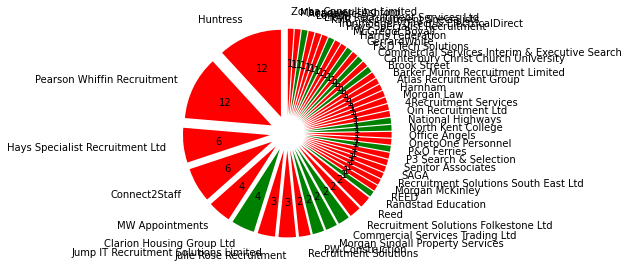

In [102]:
per_company_data = data_jobs_df.groupby("company").count().sort_values(by="job_title",ascending=False)["job_title"]
explode = [0.2]*len(per_company_data)

red_list = ["r"]*len(recruiters_in_data)
colour1 =  dict(zip(recruiters_in_data,red_list))

blue_list = ["g"]*len(companies_in_data)
colour2 =  dict(zip(companies_in_data,blue_list))

colours = {**colour1, **colour2}

labels = per_company_data.index #recruiters_in_data.append(companies_in_data) #.sort_values(ascending=True)
labels2 = ["recruiters","compaines"]

plt.pie(per_company_data, startangle=90, explode=explode, labels=labels, labeldistance= 1.2,
        colors=[colours[key] for key in labels],autopct="%1.f")
#plt.legend(labels = labels2,loc="lower right")
plt.show()
#display(per_company_data)

In [95]:
#per_company_data = data_jobs_df.groupby("company").count()#.sort_values(by="job_title",ascending=False)#["job_title"]
#labels = recruiters_in_data.append(companies_in_data).sort_values(ascending=True)
display(per_company_data)
display(per_company_data.index)

company
4Recruitment Services                              1
Academics                                          1
Atlas Recruitment Group                            1
Barker Munro Recruitment Limited                   1
Brook Street                                       1
Canterbury Christ Church University                1
Clarion Housing Group Ltd                          4
Commercial Services Interim & Executive Search     1
Commercial Services Trading Ltd                    2
Connect2Staff                                      6
F&D Tech Solutions                                 1
GerrardWhite                                       1
Harnham                                            1
Harris Federation                                  1
Hays Specialist Recruitment                        1
Hays Specialist Recruitment Ltd                    6
Huntress                                          11
IronmongeryDirect & ElectricalDirect               1
Julie Rose Recruitment                

Index(['4Recruitment Services ', 'Academics ', 'Atlas Recruitment Group',
       'Barker Munro Recruitment Limited', 'Brook Street',
       'Canterbury Christ Church University', 'Clarion Housing Group Ltd',
       'Commercial Services Interim & Executive Search',
       'Commercial Services Trading Ltd', 'Connect2Staff',
       'F&D Tech Solutions', 'GerrardWhite', 'Harnham', 'Harris Federation',
       'Hays Specialist Recruitment', 'Hays Specialist Recruitment Ltd',
       'Huntress', 'IronmongeryDirect & ElectricalDirect',
       'Julie Rose Recruitment', 'Jump IT Recruitment Solutions Limited',
       'KHR - Recruitment Specialists', 'Lloyd Recruitment Services Ltd',
       'Lorien', 'MW Appointments', 'Manpower - Ashford', 'McGregor Boyall',
       'Morgan Law', 'Morgan McKinley', 'Morgan Sindall Property Services',
       'National Highways', 'North Kent College', 'Office Angels',
       'OnetoOne Personnel', 'P&O Ferries', 'P3 Search & Selection',
       'PW Construction', 'Pea

In [91]:
display(colours)

{'4Recruitment Services ': 'r',
 'Atlas Recruitment Group': 'r',
 'Barker Munro Recruitment Limited': 'r',
 'Brook Street': 'r',
 'Commercial Services Interim & Executive Search': 'r',
 'Connect2Staff': 'r',
 'GerrardWhite': 'r',
 'Harnham': 'r',
 'Hays Specialist Recruitment': 'r',
 'Hays Specialist Recruitment Ltd': 'r',
 'Huntress': 'r',
 'Julie Rose Recruitment': 'r',
 'Jump IT Recruitment Solutions Limited': 'r',
 'KHR - Recruitment Specialists': 'r',
 'Lloyd Recruitment Services Ltd': 'r',
 'Lorien': 'r',
 'MW Appointments': 'r',
 'Manpower - Ashford': 'r',
 'McGregor Boyall': 'r',
 'Morgan Law': 'r',
 'Morgan McKinley': 'r',
 'Office Angels': 'r',
 'OnetoOne Personnel': 'r',
 'P3 Search & Selection': 'r',
 'Pearson Whiffin Recruitment': 'r',
 'Qin Recruitment Ltd': 'r',
 'REED': 'r',
 'Recruitment Solutions': 'r',
 'Recruitment Solutions Folkestone Ltd': 'r',
 'Recruitment Solutions South East Ltd': 'r',
 'Reed': 'r',
 'SAGA': 'r',
 'Senitor Associates': 'r',
 'Zorba Consulting 

In [91]:
Housing asscioations/property services
Education facilities
Goverment
Construction Compnies
Logistics Compnaies
Factories - Manufactoring
Brewer's
sales/marketing portions of companies

apprenticeship levy